In [1]:
import numpy as np
import pandas as pd
from skimage.transform import resize
from skimage.io import imread
import matplotlib.pyplot as plt
from keras.models import load_model

from code_fp.detection import load_data

from os.path import join

Using TensorFlow backend.


In [2]:
def read_csv(filename):
    res = {}
    with open(filename) as fhandle:
        next(fhandle)
        for line in fhandle:
            parts = line.rstrip('\n').split(',')
            coords = np.array([float(x) for x in parts[1:]], dtype='float64')
            res[parts[0]] = coords
    return res

In [3]:
def show(img, y):
    plt.imshow(img)
    plt.scatter(y[::2], y[1::2])
    plt.show()

In [4]:
gt = pd.read_csv('data/train20/gt.csv')

In [5]:
train_gt = read_csv(join('data/train20/', 'gt.csv'))

In [6]:
keys = list(train_gt.keys())[:10]
train_gt = {key: train_gt[key] for key in keys}

In [7]:
X_train, y_train, _ = load_data('data/train20/images/', train_gt, (100, 100, 1))

STARTED LOADING DATA
FINISHED LOADING DATA: 0.07605361938476562


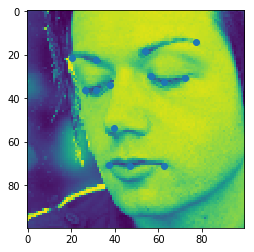

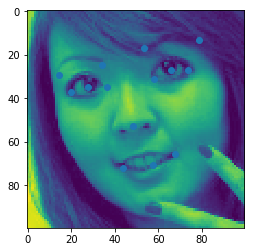

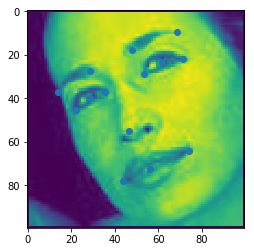

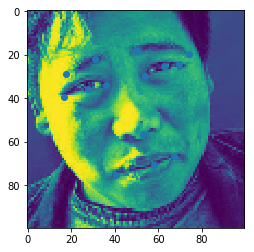

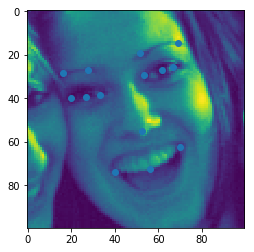

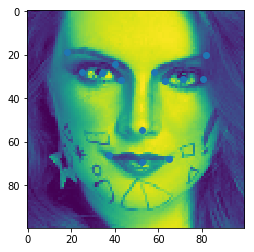

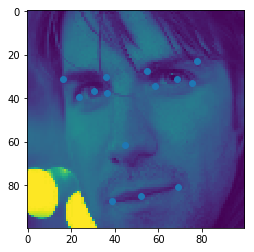

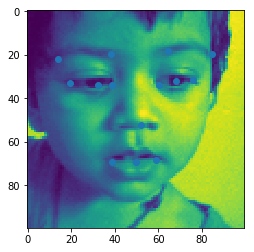

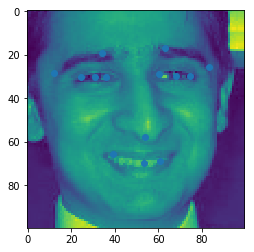

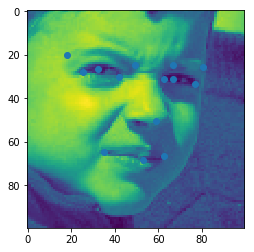

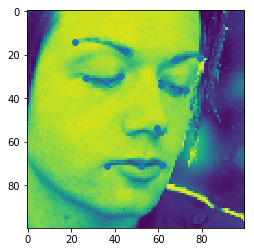

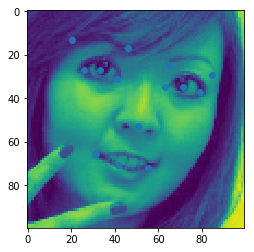

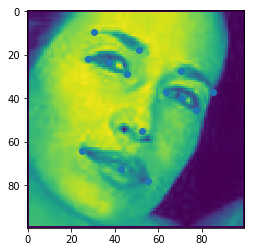

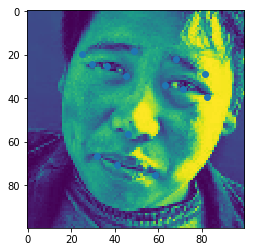

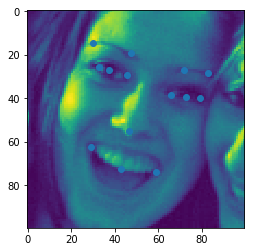

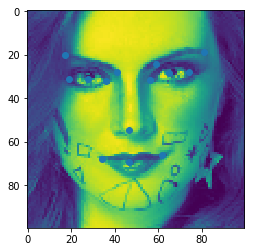

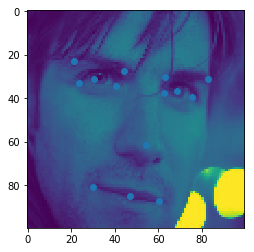

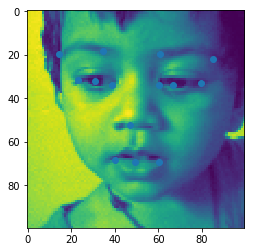

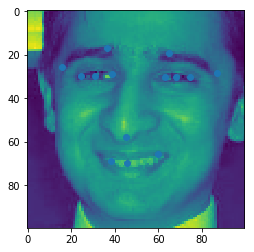

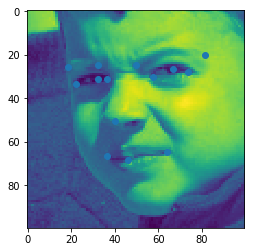

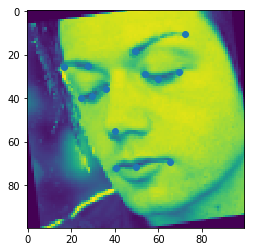

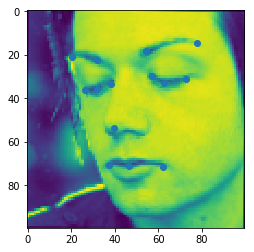

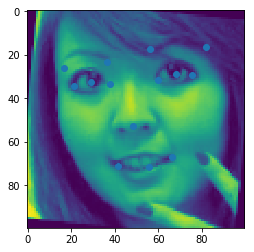

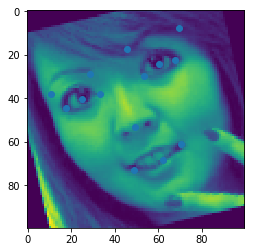

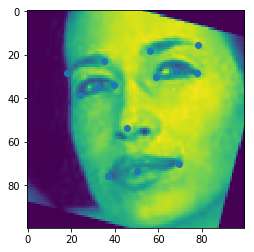

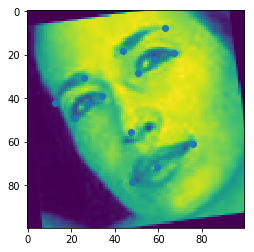

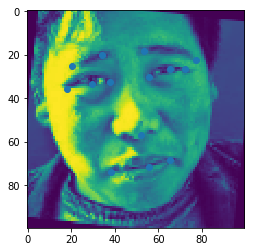

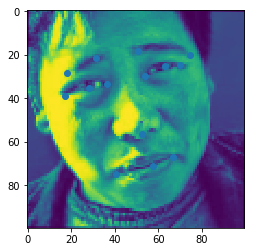

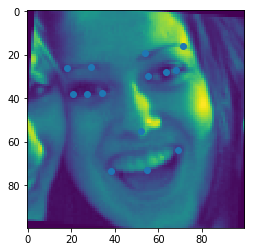

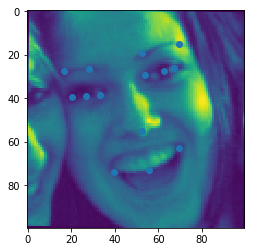

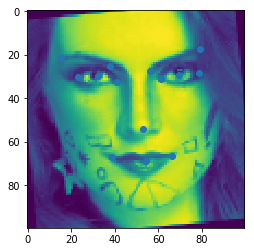

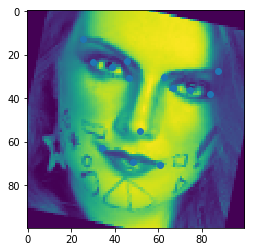

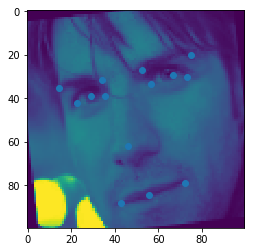

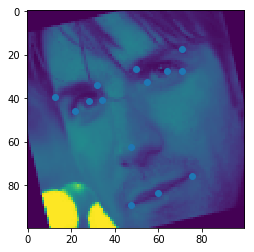

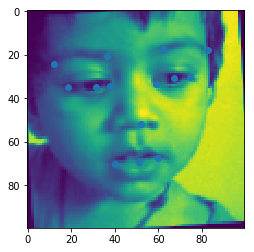

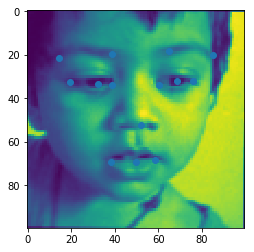

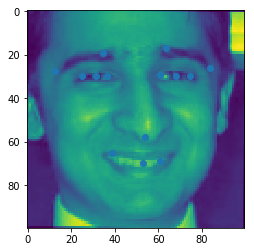

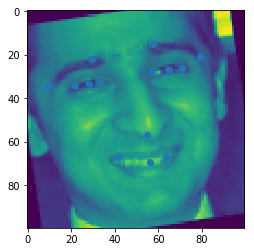

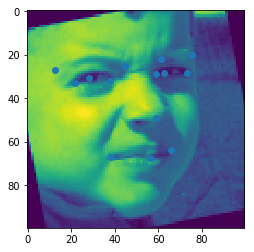

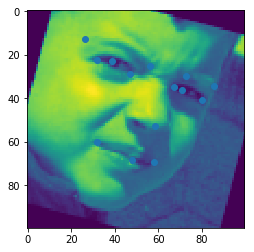

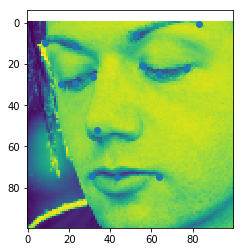

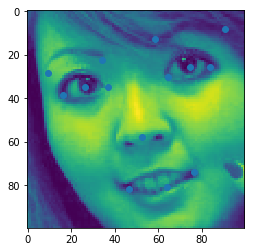

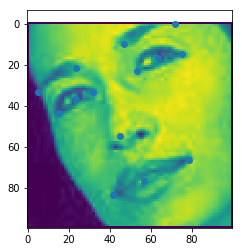

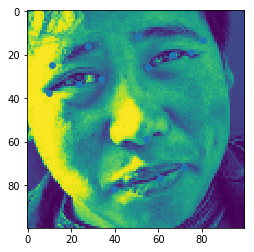

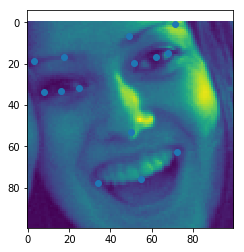

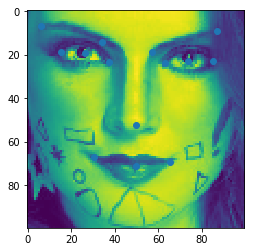

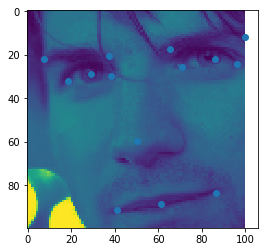

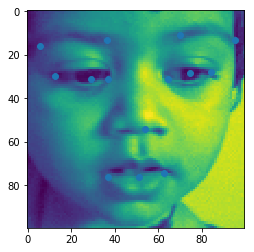

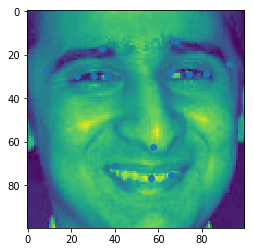

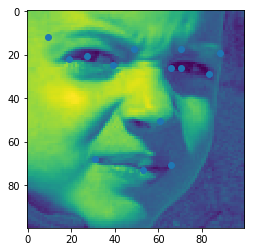

In [9]:
for i in range(X_train.shape[0]):
    show(X_train[i][..., 0], y_train[i] * 50 + 50)

In [8]:
test_gt = read_csv(join('data/test20/', 'gt.csv'))

In [9]:
keys = list(test_gt.keys())[:100]
test_gt = {key: test_gt[key] for key in keys}

In [10]:
X, y, scales = load_data('data/test20/images/', test_gt, (100, 100, 1), test=True)

STARTED LOADING DATA
FINISHED LOADING DATA: 0.8841726779937744


In [11]:
model = load_model('facepoints_model.hdf5')

In [12]:
y_pred = model.predict(X)

In [13]:
y_pred_sc = y_pred * 50 + 50

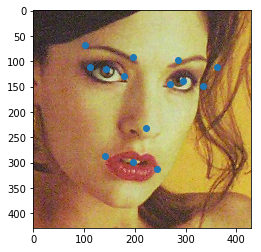

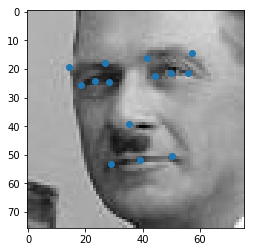

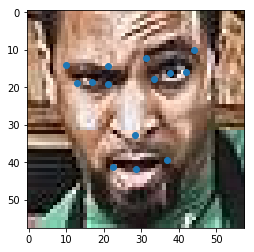

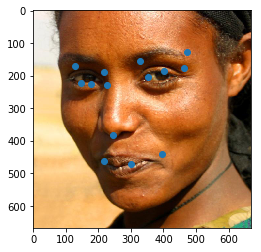

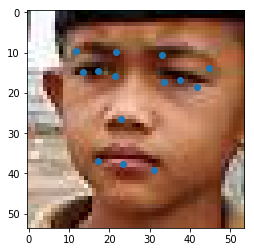

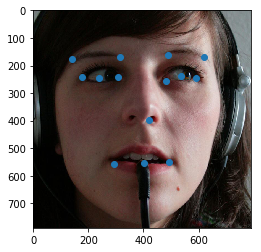

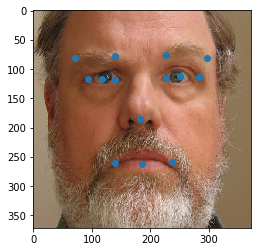

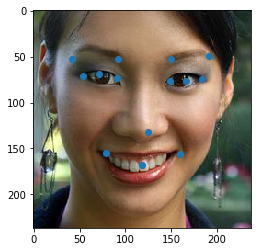

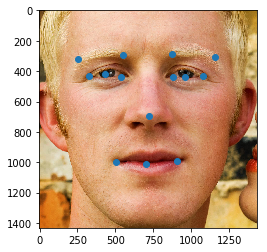

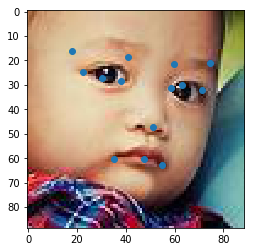

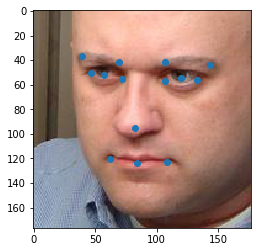

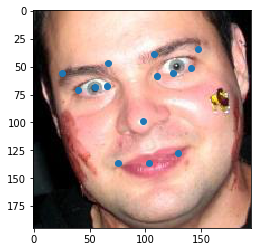

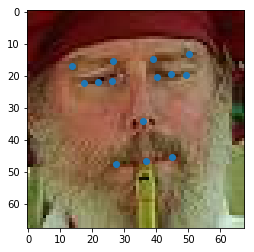

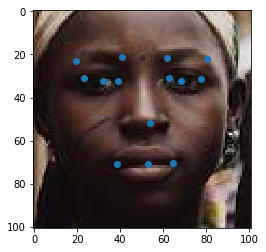

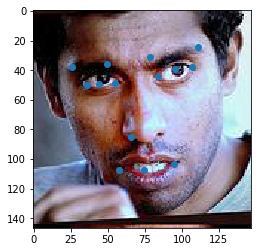

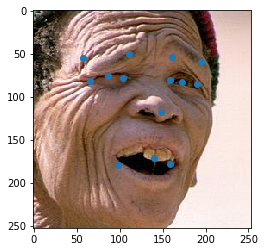

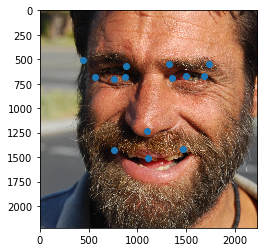

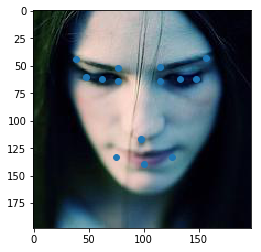

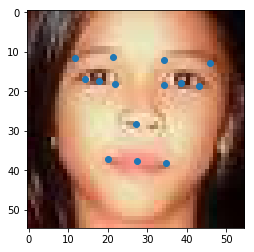

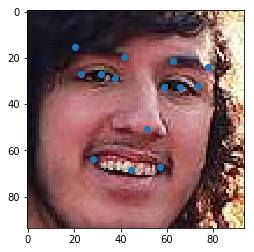

In [19]:
for i in range(20):
    dots = y_pred_sc[i]

    scale_x, scale_y, fn = scales[i]

    plt.imshow(imread('data/test20/images/' + fn), cmap='gray')
    plt.scatter(dots[::2] * scale_x, dots[1::2] * scale_y)
    plt.show()

In [ ]:
cmap